# Session 7 - Neural Networks for image data

In this notebook, we're going to see how we can train simple neural networks using ```TensorFlow```, a machine learning and deep learning framework developed by Google Research. You can find the documentation [here](https://www.tensorflow.org/).

We're still working on greyscale images at this point - next week, we'll start thinking about working with full colour images.

In [1]:
# generic tools
import numpy as np

# tools from sklearn
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# tools from tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K
from tensorflow.keras.utils import plot_model

# matplotlib
import matplotlib.pyplot as plt

2023-03-17 12:31:40.309066: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Download data, train-test split

We're going to download the ```MNIST``` dataset (the handwritten numbers) again, so that we compare this pipeline to the baseline benchmarks we created previously.

In [2]:
#fetch the data and get the data and the labels
data, labels = fetch_openml('mnist_784', version=1, return_X_y=True) #this is a way of doing it that is a bit different from how we normally have done it. 

# normalise data
data = data.astype("float")/255.0

# split data
(X_train, X_test, y_train, y_test) = train_test_split(data,
                                                    labels, 
                                                    test_size=0.2) #80/20 split

/Users/Emma-Marie/Library/Python/3.9/lib/python/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
# label binarizing = convert labels to one-hot encoding (turn a string (the label) into a vector of numbers)
# so each image is represented by a vector of numbers of 0s and a 1 (if the label is of class 2, the 1 is the second number in the vector)
# the vector has as many numbers as there are classes
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [13]:
y_train[0]
#so the first image in the training data is of class 10 (which means that the written number is a 9)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

## Define neural network architecture using ```tf.keras```

We're now going to create our neural network using ```TensorFlow```. In particular, we're going to using the ```keras``` wrapper which makes the syntax a bit simpler to work with.

The code below makes a fully-connected, feed-forward neural network with the following features:

- Input layer of 784
- One hidden layer of 256
- Second hidden layer of 128
- An output layer of 10 nodes

In [4]:
# Creating the model
# define architecture 784x256x128x10
model = Sequential() # sequential means that it is feed forward
# the first hidden layer: 256 input notes, 748 input shape
model.add(Dense(256, # dense = it is a fully connected neural network (all notes connected to each other)
                input_shape=(784,), 
                activation="relu")) # the activation function is "relu". You could also use "sigmoid".
# second hidden layer with 128 notes
model.add(Dense(128, 
                activation="relu"))
# third hidden layer = the outpput layer! Has 10 notes (a note for each class)
model.add(Dense(10, 
                activation="softmax")) 
            
# the last layer has anoter activation function than the other layers, because it is the output layer. 

2023-03-17 12:35:16.444086: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Show summary of model architecture

In [5]:
# Tool to see, if what we are doing are actually what we want
model.summary()

# "Prama #" are the number of parameters, that the model needs to learn for each layer. 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


## Visualise model layers

If you want to do view this, there are some extra things that you can install - ```TensorFlow``` gives you instructions to do that.

**NB:** This might not work on Windows (but I'm not sure).

In [6]:
plot_model(model, show_shapes=True, show_layer_names=True)

# NB: extra packages are needed for this cell to work. 

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## Compile model loss function, optimizer, and preferred metrics

One of the big differences with ```TensorFlow``` vs ```scikit-learn``` is that we have much more control over how the optimization algorithm works.

We initalize the optimizer and then we have to *compile* the model.

In [7]:
# train model using SGD
sgd = SGD(0.01) # optimization algorith. The higher the value, the quicker the model will try to learn.  
# Compiling the model (so it gest more efficient)
model.compile(loss="categorical_crossentropy", # the technical name of the loss function we alsp used with Scikit learn. Could also be "binary_crossentropy".
              optimizer=sgd, 
              metrics=["accuracy"]) # we want get the model which gives the best accuracy (could also be said to be e.g. "precission" or "recall")

# SGD: Learning too quickly can leave us with a bad model e.g. an overfed model.
# SGD: Learning too slow can make your model never finish the learning.

## Train model and save history

Once we've done that, it's just a case of fitting the model to the data.

In [20]:
history = model.fit(X_train, y_train, 
                    epochs=10, 
                    batch_size=32) # the weights are only updated after the model has looked at 32 images.

# model.fit -> the model is fit to the training data and training labels
# there are 1750 batches of 32 images (see below)

Epoch 1/10
1750/1750 [==============================] - 8s 5ms/step - loss: 0.0508 - accuracy: 0.9867
Epoch 2/10
1750/1750 [==============================] - 8s 4ms/step - loss: 0.0477 - accuracy: 0.9876
Epoch 3/10
1750/1750 [==============================] - 8s 5ms/step - loss: 0.0451 - accuracy: 0.9884
Epoch 4/10
1750/1750 [==============================] - 9s 5ms/step - loss: 0.0427 - accuracy: 0.9892
Epoch 5/10
1750/1750 [==============================] - 8s 5ms/step - loss: 0.0400 - accuracy: 0.9902
Epoch 6/10
1750/1750 [==============================] - 8s 5ms/step - loss: 0.0381 - accuracy: 0.9905
Epoch 7/10
1750/1750 [==============================] - 8s 5ms/step - loss: 0.0359 - accuracy: 0.9912
Epoch 8/10
1750/1750 [==============================] - 9s 5ms/step - loss: 0.0337 - accuracy: 0.9920
Epoch 9/10
1750/1750 [==============================] - 8s 4ms/step - loss: 0.0323 - accuracy: 0.9924
Epoch 10/10
1750/1750 [==============================] - 8s 5ms/step - loss: 0.030

## Visualise using ```matplotlib```

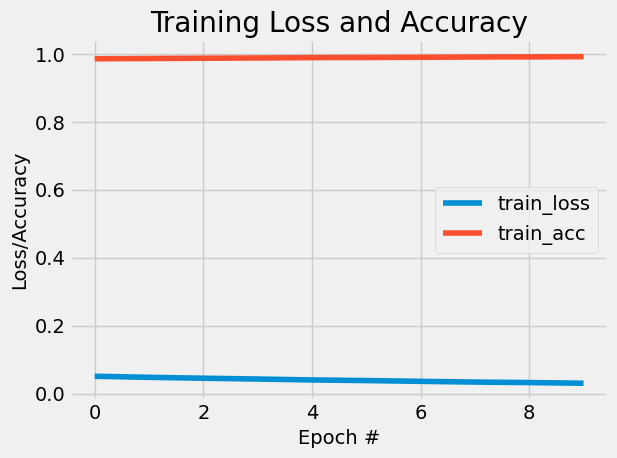

In [21]:
plt.style.use("fivethirtyeight") # just the style of the visualization
plt.figure()
plt.plot(np.arange(0, 10), history.history["loss"], label="train_loss")
#plt.plot(np.arange(0, 10), history.history["val_loss"], label="val_loss", linestyle=":")
plt.plot(np.arange(0, 10), history.history["accuracy"], label="train_acc")
#plt.plot(np.arange(0, 10), history.history["val_accuracy"], label="val_acc", linestyle=":")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.tight_layout()
plt.legend()
plt.show()

## Classifier metrics

We need to do a little bit of extra work to get the classification report to work properly.

In [22]:
# evaluate network
print("[INFO] evaluating network...")
predictions = model.predict(X_test, batch_size=32)

[INFO] evaluating network...
438/438 [==============================] - 2s 4ms/step


In [25]:
y_test[0]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [26]:
print(classification_report(y_test.argmax(axis=1), #compares all of the highest values
                            predictions.argmax(axis=1), 
                            target_names=[str(x) for x in lb.classes_])) # take the classes and create a list of label names for our class refort to use

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1383
           1       0.99      0.99      0.99      1564
           2       0.97      0.98      0.98      1380
           3       0.98      0.97      0.97      1398
           4       0.98      0.98      0.98      1400
           5       0.98      0.96      0.97      1300
           6       0.97      0.99      0.98      1381
           7       0.97      0.98      0.98      1458
           8       0.96      0.97      0.97      1385
           9       0.99      0.96      0.97      1351

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000



### Task

1. Turn the above into a ```.py``` script which can be run from the command line. Use argparse if you think it's relevant!
2. Use this notebook as a template to train a neural network on the ```Cifar-10``` dataset instead of ```MNIST```.
3. Turn *that* notebook into a ```.py``` script, too